In [13]:
import numpy as np
import matplotlib.pyplot as plt
import segyio


In [14]:
def read_seismic_cube(file_path):
  """
  :param file_path: Путь к файлу
  :return: возвращает куб в виде списков по Inlines, Xlines и Sampels (координаты x, y, z)
  а также словарь сейсмотрасс, где ключ это координата пересечения Inlines и Xlines, а значение это список значений сейсмотрасс
  """
  with segyio.open(file_path, 'r') as segyfile:
      x = list(segyfile.ilines)
      y = list(segyfile.xlines)
      z_0 = list(segyfile.samples)
      z = list()
      for i in range(len(z_0)):
          z.append(int(z_0[i]))
      cube = segyio.tools.cube(segyfile)
      traces = {f"{x[i]}_{y[j]}": cube[i][j][:] for i in range(len(x)) for j in range(len(y))}
  return x, y, z, traces

In [15]:
file_path = 'C:/HV/Seismic/datas/Cube_TWT.segy'
ilines, xlines, samples, traces = read_seismic_cube(file_path)

In [16]:
def contains_negative(lst):
    return any(x < 0 for x in lst)

In [17]:
zero_index = []
for key in traces:
    if contains_negative(traces[key]):
        zero_index.append(key)
if len(zero_index) == 0:
    print('тест пройден успешно')
else:
    print('Значения скоростей должны быть положительными. Проверьте скоростную модель')

Значения скоростей должны быть положительными. Проверьте скоростную модель


In [ ]:
# Создание графика (ОООООООчень долго)
plt.figure(figsize=(8, 6))

# Перебор всех возможных комбинаций координат
for x in ilines:
    for y in xlines:
        if str(x)+'_'+str(y) in zero_index:
            plt.scatter(x, y, c='red')
        else:
            plt.scatter(x, y, c='blue')  # Выбираем цвет для отображения
        
# Настройка осей
plt.xlim(min(ilines) - 1, max(ilines) + 1)  # Установка ограничений по оси X
plt.ylim(min(xlines) - 1, max(xlines) + 1)  # Установка ограничений по оси Y

# Подписи и заголовок
plt.title('Карта (каждый с каждым)')
plt.xlabel('Координаты X')
plt.ylabel('Координаты Y')

# Отображение графика
plt.grid()
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.show()

In [ ]:
#Выбираем нужную координату Х (инлайн) и строим разрез по ней. Т.к. точек слишком много, то вывели только одну для примера
X = 1025
map_xlines_samples = {}
for i in range(len(xlines)):
    for j in range(len(samples)):
        map_xlines_samples[f"{xlines[i]}_{samples[j]}"] = traces[f"{X}_{xlines[i]}"][j]
points = []
values = []
for coord_str, value in map_xlines_samples.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y * (-1)))
    values.append(value)

plt.figure(figsize=(7, 7))
scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
plt.xticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.yticks([(-1)*samples[0], (-1)*samples[50], (-1)*samples[100], (-1)*samples[-1]])
plt.xlabel('Крослайны')
plt.ylabel('Глубины')
plt.title(f"Разрез по значению {X}")
plt.colorbar(scatter, label='Шкала  значений сейсмотрассы')


plt.grid(False)  # Отключение сетки
plt.show()


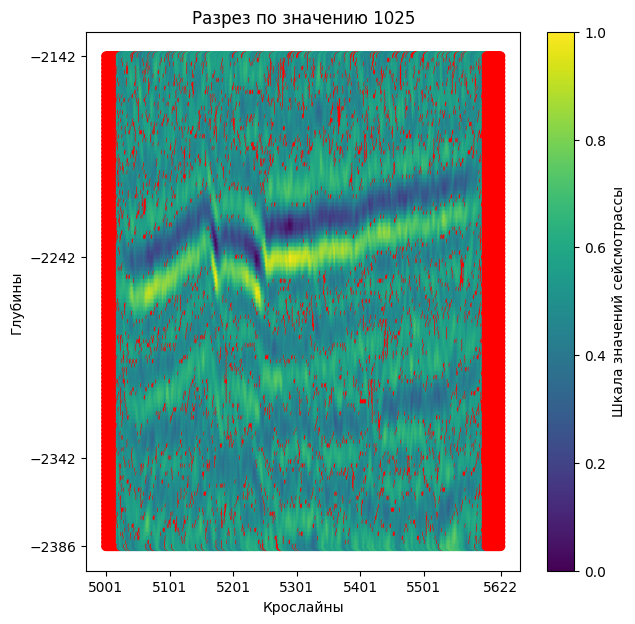

In [17]:
# добавлено условие, чтобы все нулевые значения на разрезе были красными
X = 1025
map_xlines_samples = {}
for i in range(len(xlines)):
    for j in range(len(samples)):
        map_xlines_samples[f"{xlines[i]}_{samples[j]}"] = traces[f"{X}_{xlines[i]}"][j]

points = []
values = []
for coord_str, value in map_xlines_samples.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y * (-1)))
    values.append(value)

points = np.array(points)
values = np.array(values)

# Создаем массив цветов, где по умолчанию все цвета из шкалы значений
colors = plt.cm.viridis((values - np.min(values)) / (np.max(values) - np.min(values)))

# Меняем цвет на красный для значений, равных 0
colors[values == 0] = [1, 0, 0, 1]  # RGBA для красного цвета

plt.figure(figsize=(7, 7))
scatter = plt.scatter(x=points[:, 0], y=points[:, 1], c=colors)
plt.xticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.yticks([(-1)*samples[0], (-1)*samples[50], (-1)*samples[100], (-1)*samples[-1]])
plt.xlabel('Крослайны')
plt.ylabel('Глубины')
plt.title(f"Разрез по значению {X}")
plt.colorbar(scatter, label='Шкала значений сейсмотрассы')

plt.grid(False)  # Отключение сетки
plt.show()
